## Task-11
## Name: Aftab Ahmed
## Registration ID: SIRSS2310

### CIFAR-10

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets,layers,models,Model

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
y_trainR = y_train.reshape(-1,)
y_trainR[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_testR = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

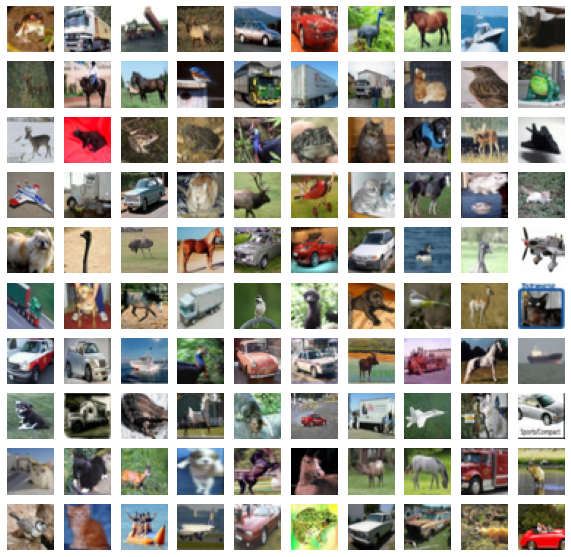

In [7]:
plt.figure(figsize = (10,10))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(x_train[i])

In [8]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

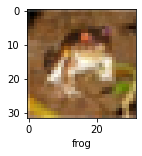

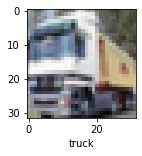

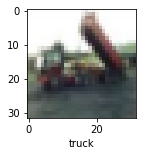

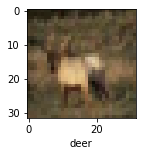

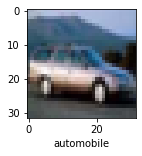

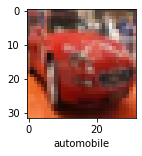

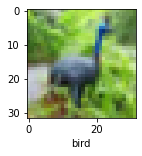

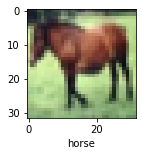

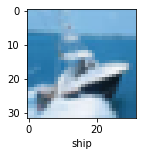

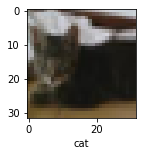

In [9]:
for i in range(10):
  plot_sample(x_train, y_trainR, i)

In [10]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_datagen.fit(x_train)

In [13]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen.fit(x_test)

In [14]:
model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape = (32,32,3)),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Flatten(),
      
                tf.keras.layers.Dense(512, activation = 'relu'),
                tf.keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [15]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = SGD(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
history = model.fit(
          train_datagen.flow(x_train,y_train, batch_size = 128),
          validation_data = val_datagen.flow(x_test, y_test),
          batch_size = 128,
          epochs = 25,
          verbose = 1
)

Epoch 1/25
391/391 [==============================] - 22s 50ms/step - loss: 2.2805 - accuracy: 0.1444 - val_loss: 2.2307 - val_accuracy: 0.1826
Epoch 2/25
391/391 [==============================] - 19s 49ms/step - loss: 2.0980 - accuracy: 0.2368 - val_loss: 2.1577 - val_accuracy: 0.1998
Epoch 3/25
391/391 [==============================] - 20s 50ms/step - loss: 1.9677 - accuracy: 0.2827 - val_loss: 1.8887 - val_accuracy: 0.3239
Epoch 4/25
391/391 [==============================] - 20s 51ms/step - loss: 1.8867 - accuracy: 0.3170 - val_loss: 1.7955 - val_accuracy: 0.3516
Epoch 5/25
391/391 [==============================] - 20s 52ms/step - loss: 1.8058 - accuracy: 0.3487 - val_loss: 1.6933 - val_accuracy: 0.3940 ETA: 0s - loss: 1.8056 - accuracy - ETA: 0s - loss: 1.8061 - accuracy
Epoch 6/25
391/391 [==============================] - 21s 53ms/step - loss: 1.7332 - accuracy: 0.3753 - val_loss: 1.6232 - val_accuracy: 0.4223
Epoch 7/25
391/391 [==============================] - 21s 54ms/ste

In [17]:
history.history['accuracy']

[0.14441999793052673,
 0.23681999742984772,
 0.28266000747680664,
 0.31700000166893005,
 0.34874001145362854,
 0.3753199875354767,
 0.398499995470047,
 0.41165998578071594,
 0.42392000555992126,
 0.4403400123119354,
 0.4510599970817566,
 0.4644800126552582,
 0.47058001160621643,
 0.4801799952983856,
 0.4883800148963928,
 0.49441999197006226,
 0.5004799962043762,
 0.5103200078010559,
 0.517579972743988,
 0.5223000049591064,
 0.5280600190162659,
 0.5347599983215332,
 0.5379199981689453,
 0.5430600047111511,
 0.5481200218200684]

In [18]:
history.history['loss']

[2.280498504638672,
 2.0980396270751953,
 1.9676787853240967,
 1.8866965770721436,
 1.8058007955551147,
 1.7331722974777222,
 1.676236867904663,
 1.632853627204895,
 1.595645785331726,
 1.5580729246139526,
 1.529281735420227,
 1.502214789390564,
 1.4790667295455933,
 1.4583683013916016,
 1.4345885515213013,
 1.414773941040039,
 1.3982020616531372,
 1.3846741914749146,
 1.3617304563522339,
 1.3476128578186035,
 1.3337056636810303,
 1.3184596300125122,
 1.3084285259246826,
 1.291466474533081,
 1.2830302715301514]

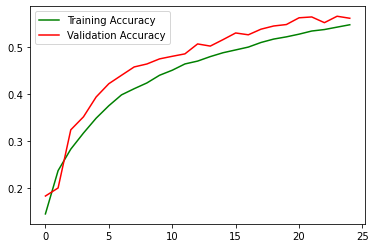

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.legend()

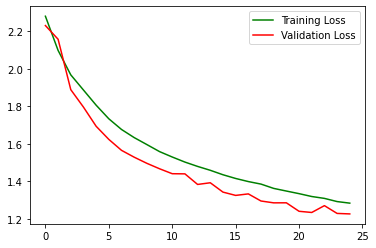

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation Loss')
plt.legend()

In [40]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 216.9716 - accuracy: 0.4477


[216.97164916992188, 0.44769999384880066]

In [41]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.5649507e-32, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.6374702e-29],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [42]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 0, 0, 3]

In [43]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

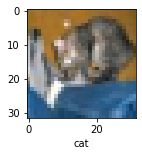

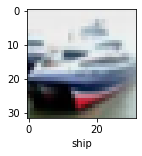

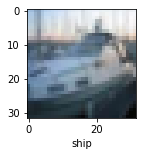

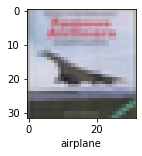

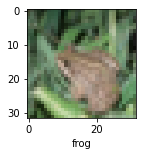

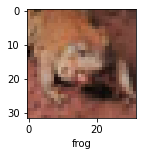

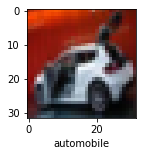

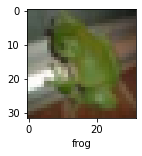

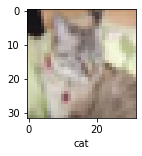

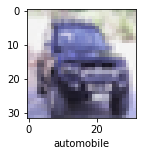

In [44]:
for i in range(10):
    plot_sample(x_test, y_testR, i)

In [54]:
from sklearn.metrics import confusion_matrix , classification_report
y_predB = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_predB]

print("Classification Report: \n", classification_report(y_testR, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.85      0.50      1000
           1       0.62      0.72      0.67      1000
           2       0.58      0.21      0.31      1000
           3       0.34      0.28      0.31      1000
           4       0.93      0.03      0.05      1000
           5       0.33      0.59      0.42      1000
           6       0.90      0.14      0.25      1000
           7       0.46      0.67      0.55      1000
           8       0.74      0.34      0.47      1000
           9       0.48      0.64      0.55      1000

    accuracy                           0.45     10000
   macro avg       0.57      0.45      0.41     10000
weighted avg       0.57      0.45      0.41     10000

